In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio, display
import librosa
import librosa.display

In [ ]:
# --- Step 1: Load the WAV files ---
file1 = '/content/drive/MyDrive/Colab Notebooks/recordings/i2s1.wav'
file2 = '/content/drive/MyDrive/Colab Notebooks/recordings/i2s2.wav'

Fs1, y1 = wavfile.read(file1)
Fs2, y2 = wavfile.read(file2)

In [ ]:
# --- Step 2: Convert to mono if stereo ---
if y1.ndim > 1:
    y1 = y1.mean(axis=1)
if y2.ndim > 1:
    y2 = y2.mean(axis=1)

In [ ]:
# --- Step 3: FFT calculation ---
def compute_fft(y, Fs):
    N = len(y)
    t = np.arange(N)/Fs
    Y = np.fft.fft(y)
    f = np.fft.fftfreq(N, d=1/Fs)
    P2 = np.abs(Y/N)
    P1 = P2[:N//2]*2
    f1 = f[:N//2]
    return t, y, f1, P1

t1, y1, f1, P1 = compute_fft(y1, Fs1)
t2, y2, f2, P2 = compute_fft(y2, Fs2)

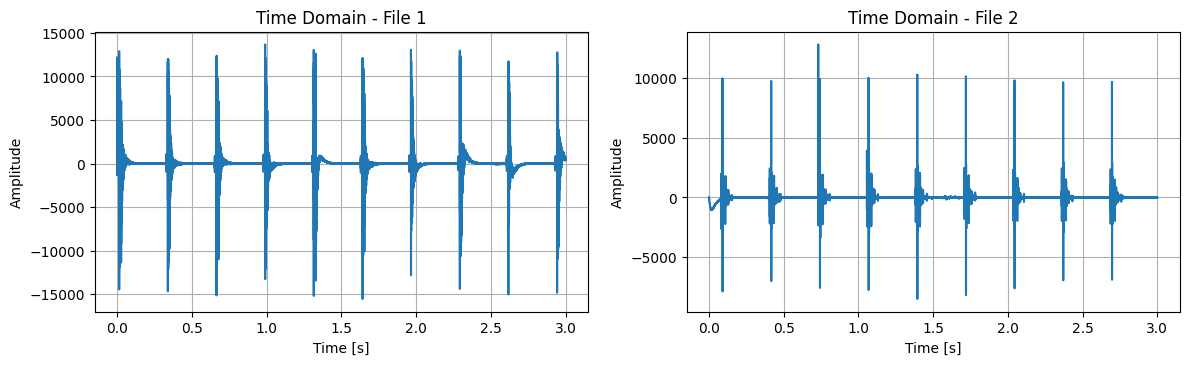

In [ ]:
# --- Step 4: Plot time-domain signals ---
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
plt.plot(t1, y1)
plt.title('Time Domain - File 1')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(t2, y2)
plt.title('Time Domain - File 2')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

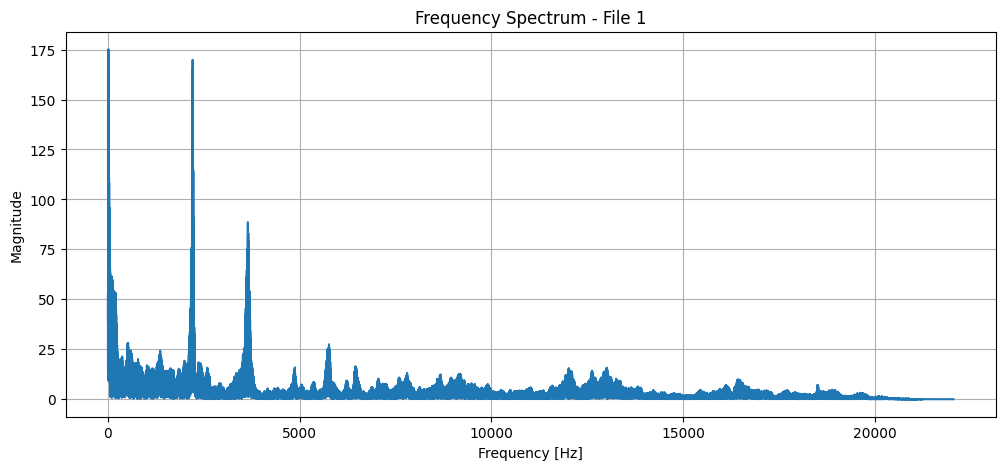

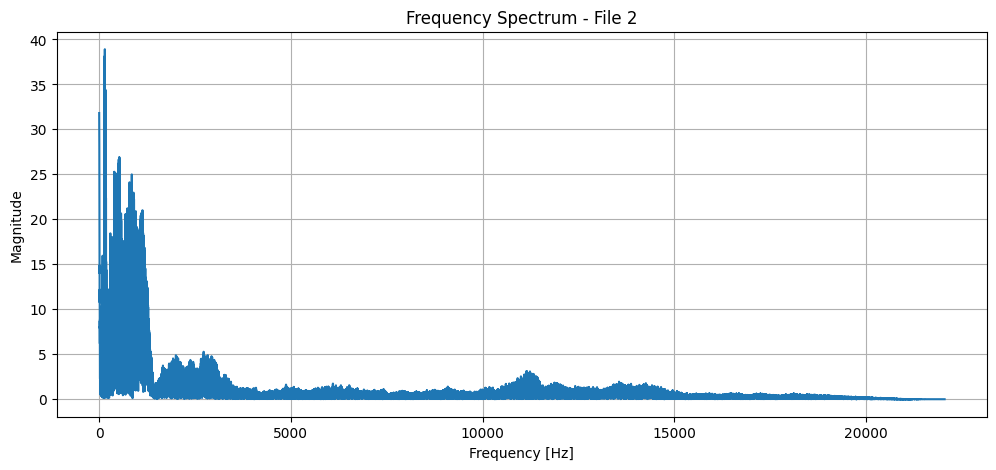

In [ ]:
# --- Step 5: Plot frequency spectra ---
plt.figure(figsize=(12,5))
plt.plot(f1, P1)
plt.title('Frequency Spectrum - File 1')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

plt.figure(figsize=(12,5))
plt.plot(f2, P2)
plt.title('Frequency Spectrum - File 2')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [ ]:
# --- Step 6: Play audio files ---
print("Playing File 1:")
display(Audio(y1, rate=Fs1))
print("Playing File 2:")
display(Audio(y2, rate=Fs2))

Playing File 1:


Playing File 2:


In [ ]:
# --- Step 7: Frequency characteristics ---
def frequency_characteristics(frequencies, magnitude):
    dominant_freq = frequencies[np.argmax(magnitude)]
    mean_freq = np.sum(frequencies * magnitude) / np.sum(magnitude)
    bandwidth = frequencies[np.where(magnitude > (0.5 * np.max(magnitude)))][[-1]][0] - frequencies[np.where(magnitude > (0.5 * np.max(magnitude)))][0]
    return dominant_freq, mean_freq, bandwidth

dom1, mean1, bw1 = frequency_characteristics(f1, P1)
dom2, mean2, bw2 = frequency_characteristics(f2, P2)

print(f"\nFrequency characteristics of File 1:")
print(f"Dominant Frequency: {dom1:.2f} Hz")
print(f"Mean Frequency: {mean1:.2f} Hz")
print(f"Approximate Bandwidth: {bw1:.2f} Hz")

print(f"\nFrequency characteristics of File 2:")
print(f"Dominant Frequency: {dom2:.2f} Hz")
print(f"Mean Frequency: {mean2:.2f} Hz")
print(f"Approximate Bandwidth: {bw2:.2f} Hz")


Frequency characteristics of File 1:
Dominant Frequency: 13.67 Hz
Mean Frequency: 6656.94 Hz
Approximate Bandwidth: 3645.00 Hz

Frequency characteristics of File 2:
Dominant Frequency: 147.33 Hz
Mean Frequency: 4705.03 Hz
Approximate Bandwidth: 1129.67 Hz


In [ ]:
# --- Step 8: Spectral tilt and shape ---
def spectral_features(y, Fs):
    y_float = y.astype(float)
    S = np.abs(librosa.stft(y_float))
    centroid = librosa.feature.spectral_centroid(S=S, sr=Fs)
    bandwidth = librosa.feature.spectral_bandwidth(S=S, sr=Fs)
    rolloff = librosa.feature.spectral_rolloff(S=S, sr=Fs)
    flatness = librosa.feature.spectral_flatness(S=S)

    # Spectrum tilt (slope of log spectrum)
    freqs = librosa.fft_frequencies(sr=Fs)
    log_spectrum = np.log(np.mean(S, axis=1) + 1e-8)
    slope, intercept = np.polyfit(freqs, log_spectrum, 1)

    return centroid, bandwidth, rolloff, flatness, slope, S, freqs, log_spectrum

cent1, bw_spec1, roll1, flat1, tilt1, S1, freqs1, logspec1 = spectral_features(y1, Fs1)
cent2, bw_spec2, roll2, flat2, tilt2, S2, freqs2, logspec2 = spectral_features(y2, Fs2)

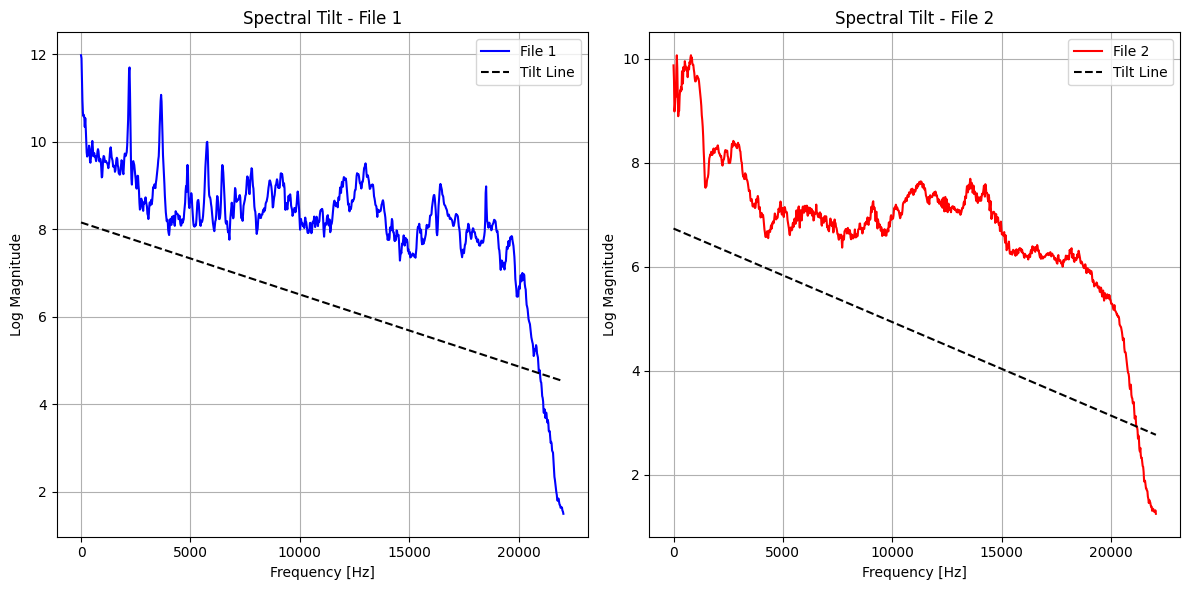


Spectral Shape and Tilt (File 1):
Spectral Centroid: 4308.16 Hz
Spectral Bandwidth: 4660.37 Hz
Spectral Rolloff: 8975.19 Hz
Spectral Flatness: 0.0233
Spectral Tilt (slope): -0.000165

Spectral Shape and Tilt (File 2):
Spectral Centroid: 4397.03 Hz
Spectral Bandwidth: 4716.52 Hz
Spectral Rolloff: 9383.82 Hz
Spectral Flatness: 0.0368
Spectral Tilt (slope): -0.000180


In [ ]:
# --- Step 9: Plot spectral shape and tilt ---
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(freqs1, logspec1, label='File 1', color='b')
plt.plot(freqs1, np.polyval([tilt1, np.mean(logspec1)], freqs1), 'k--', label='Tilt Line')
plt.title('Spectral Tilt - File 1')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Log Magnitude')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(freqs2, logspec2, label='File 2', color='r')
plt.plot(freqs2, np.polyval([tilt2, np.mean(logspec2)], freqs2), 'k--', label='Tilt Line')
plt.title('Spectral Tilt - File 2')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Log Magnitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

print("\nSpectral Shape and Tilt (File 1):")
print(f"Spectral Centroid: {np.mean(cent1):.2f} Hz")
print(f"Spectral Bandwidth: {np.mean(bw_spec1):.2f} Hz")
print(f"Spectral Rolloff: {np.mean(roll1):.2f} Hz")
print(f"Spectral Flatness: {np.mean(flat1):.4f}")
print(f"Spectral Tilt (slope): {tilt1:.6f}")

print("\nSpectral Shape and Tilt (File 2):")
print(f"Spectral Centroid: {np.mean(cent2):.2f} Hz")
print(f"Spectral Bandwidth: {np.mean(bw_spec2):.2f} Hz")
print(f"Spectral Rolloff: {np.mean(roll2):.2f} Hz")
print(f"Spectral Flatness: {np.mean(flat2):.4f}")
print(f"Spectral Tilt (slope): {tilt2:.6f}")

In [ ]:
# --- Step 10: MFCC feature extraction ---
def compute_mfcc(y, Fs):
    y_float = y.astype(float)
    mfccs = librosa.feature.mfcc(y=y_float, sr=Fs, n_mfcc=13)
    return mfccs

mfcc1 = compute_mfcc(y1, Fs1)
mfcc2 = compute_mfcc(y2, Fs2)

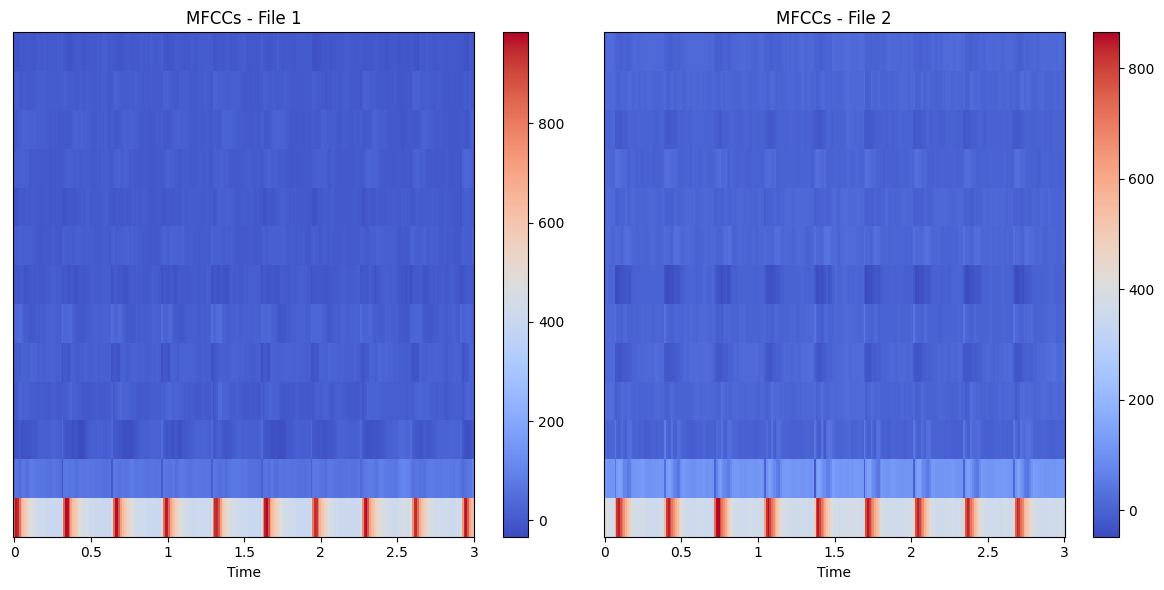

In [ ]:
# --- Step 11: Plot MFCCs ---
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
librosa.display.specshow(mfcc1, sr=Fs1, x_axis='time')
plt.colorbar()
plt.title('MFCCs - File 1')

plt.subplot(1,2,2)
librosa.display.specshow(mfcc2, sr=Fs2, x_axis='time')
plt.colorbar()
plt.title('MFCCs - File 2')

plt.tight_layout()
plt.show()

In [ ]:
print(mfcc1)
print(mfcc2)

[[ 8.69876352e+02  9.64385327e+02  9.48526705e+02 ...  7.02198555e+02
   6.39937330e+02  6.26088934e+02]
 [ 4.87176370e+01  6.13750657e+01  5.93437607e+01 ...  7.22479401e+01
   7.24641311e+01  9.82885807e+01]
 [-1.32372650e+01 -1.60298445e+01 -1.24042663e+01 ... -1.38580072e+01
  -1.45989434e+01  5.04685073e-01]
 ...
 [ 1.45084956e+00  1.73809822e+00  5.23857606e+00 ...  3.75170392e+00
   1.44769467e+01  1.78341130e+01]
 [ 1.13635837e+01  1.05270242e+01  7.02460803e+00 ...  1.05451051e+01
   7.28812559e-01 -6.67904772e-01]
 [-7.97640456e+00 -1.18873363e+01 -1.32961026e+01 ... -2.14155595e+00
  -5.66157514e+00 -3.13135679e+00]]
[[ 4.35949990e+02  4.14661110e+02  3.79910599e+02 ...  3.71205138e+02
   3.70477224e+02  3.57635478e+02]
 [ 1.33088182e+02  1.26487608e+02  1.10760620e+02 ...  1.17590920e+02
   1.17010467e+02  1.13254560e+02]
 [ 1.89518260e+01  1.29584100e+01  1.81796440e+00 ... -3.33621785e+00
  -4.86202080e+00 -3.99993196e+00]
 ...
 [ 1.13162475e+01  7.23364101e+00  2.9642168

In [ ]:
# --- Step 12: Print MFCC summary ---
print("\nMFCC feature summary for File 1 (mean of each coefficient):")
print(np.round(np.mean(mfcc1, axis=1), 2))

print("\nMFCC feature summary for File 2 (mean of each coefficient):")
print(np.round(np.mean(mfcc2, axis=1), 2))


MFCC feature summary for File 1 (mean of each coefficient):
[530.94  63.76   3.63   8.49  11.    14.    -1.08   6.77   1.11   4.9
   5.28   4.26  -1.73]

MFCC feature summary for File 2 (mean of each coefficient):
[462.7  104.35   3.79   7.38   2.4    5.87 -10.14  10.88   4.83   3.81
  -4.67   6.31   7.08]


# **Characteristics of MFCC:**
**MFCC 0 (The Constant Term):** This coefficient often represents the overall energy or loudness of the sound. It is sometimes removed to focus on spectral shape rather than volume.

**Higher coefficients (e.g., 1 to 12):** These coefficients represent the "shape" or "contour" of the spectral envelope. They are designed to capture the characteristics of a sound that are perceptually important to humans.

**Positive vs. Negative values:** A positive value for a coefficient indicates that the spectral energy is concentrated in the lower-frequency regions that the coefficient represents, while a negative value indicates the energy is concentrated in the higher-frequency regions.

# Analysis
File 1 have more high-frequency content (sharp sounding bright audio).

File 2 have more bass-heavy or less bright audio.

# **Steps for MFCC:**
1. Pre-Emphasis
2. Framing (20ms width with 10ms overlap)
3. Windowing (Hamming Window)
4. FFT
5. Applying Mel Filter Banks (Mel-spaced triangular filters)
6. Take the logarithm of each energy
7. Discrete Cosine Transform (to generate the coefficients)
8. Take the mean or standard deviation for each coefficients.
9. Alternatively use Principality Component Analysis (PCA) for dimensionality reduction.
10. Feed the coefficients to a machine learning model (preferrable in our study: Support Vector Machine or SVM)
11. Output Maturity Confidence Level or Audio Power (0-100)
12. Classify with Fuzzy Logic System supported by data from the image captured.


##Support Vector Machine
A machine learning model usually used for classification, regression, and outlier detection (data points that are significantly different from the rest of dataset).

**Advantages of SVM:**
1. Effective in high dimensional spaces.
2. Still effective in cases where number of dimensions is greater than the number of samples.
3. Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

Note: SVM can be configured to classification, score and probabilities, regression, and etc depending on application. See: https://scikit-learn.org/stable/modules/svm.html